In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping


In [3]:
# Set up data generators with data augmentation
train_datagen = ImageDataGenerator(
    zoom_range=0.5,              # Randomly zoom in/out on the image
    shear_range=0.3,             # Randomly apply shearing transformation
    rescale=1/255,               # Rescale pixel values to [0, 1]
    horizontal_flip=True,        # Randomly flip the image horizontally
    vertical_flip=True,          # Randomly flip the image vertically
    rotation_range=90,           # Randomly rotate the image between -90 and 90 degrees
    brightness_range=[0.2, 1.0], # Randomly adjust the brightness of the image
)

val_datagen = ImageDataGenerator(rescale=1/255)

# Create a generator for training data with augmentation
train_generator = train_datagen.flow_from_directory(
    directory='Dataset/train',
    target_size=(256, 256),
    batch_size=32, 
    class_mode='categorical'
)

# Create a generator for validation data without augmentation
val_generator = val_datagen.flow_from_directory(
    directory='Dataset/valid',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)



Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [4]:
t_img, label = train_generator.next()

In [5]:
t_img.shape

(32, 256, 256, 3)

In [6]:
class_names = list(train_generator.class_indices.keys())
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
images, labels = next(train_generator)

for i in range(12):
    ax = plt.subplot(4, 3, i+1)
    plt.imshow(images[i])
    plt.title(class_names[labels[i].argmax()])
    plt.axis("off")


In [8]:
# Define the model architecture
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(38, activation='softmax')
])

Metal device set to: Apple M1


In [9]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_checkpoint = ModelCheckpoint('best_model.h5',
                                   save_best_only=True,
                                   save_weights_only=False)



# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



# Train the model with the callbacks
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=40,
                    callbacks=[early_stop, model_checkpoint],
                   shuffle=True)


Epoch 1/40


2023-04-22 08:53:12.037942: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2197/2197 [==============================] - 786s 358ms/step - loss: 1.8716 - accuracy: 0.4507 - val_loss: 0.9362 - val_accuracy: 0.7095
Epoch 2/40
2197/2197 [==============================] - 842s 383ms/step - loss: 0.8128 - accuracy: 0.7450 - val_loss: 0.5604 - val_accuracy: 0.8202
Epoch 3/40
2197/2197 [==============================] - 802s 365ms/step - loss: 0.5964 - accuracy: 0.8110 - val_loss: 0.3796 - val_accuracy: 0.8818
Epoch 4/40
2197/2197 [==============================] - 798s 363ms/step - loss: 0.4987 - accuracy: 0.8436 - val_loss: 0.3743 - val_accuracy: 0.8860
Epoch 5/40
2197/2197 [==============================] - 822s 374ms/step - loss: 0.4405 - accuracy: 0.8609 - val_loss: 0.3389 - val_accuracy: 0.8958
Epoch 6/40
2197/2197 [==============================] - 811s 369ms/step - loss: 0.3939 - accuracy: 0.8745 - val_loss: 0.3062 - val_accuracy: 0.9062
Epoch 7/40
2197/2197 [==============================] - 818s 372ms/step - loss: 0.3720 - accuracy: 0.8817 - val_loss: 0.467

In [12]:
# # Define early stopping to prevent overfitting
# early_stop = EarlyStopping(monitor='val_loss', patience=)

# # Train the model
# history = model.fit(
#     train_generator,
#     validation_data=val_generator,
#     epochs=40,
#     callbacks=[early_stop]
# )


In [13]:
model.save('my_model_v5.h5')

In [14]:
acc = model.evaluate_generator(val_generator)[1]

print(f"The accuracy of your model is {acc *100} %")

/var/folders/f5/xb4v70_j0lj5t85gdv_td55c0000gn/T/ipykernel_8787/2485115042.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(val_generator)[1]


The accuracy of your model is 93.67744326591492 %


In [15]:
ref = dict(zip(list(train_generator.class_indices.values()) , list(train_generator.class_indices.keys())))

In [16]:
import pickle
with open('ref.pickle', 'wb') as handle:
    pickle.dump(ref, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [26]:
from keras.models import load_model
model = load_model("/Users/shankalpapokharel/AI Projects/gpu_ipd/best_model.h5")

In [30]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def prediction(path):
    
    # Load the image and resize it to (256, 256)
    img = load_img(path, target_size = (256, 256))
    
    # Convert the image to a NumPy array
    x = img_to_array(img)
    
    # Add an extra dimension to the array to create a batch of size 1
    x = np.expand_dims(x, axis=0)

    # Scale the pixel values to the range [0, 1]
    x = x/255.0
    
    # Make a prediction using the trained model
    predictions = model.predict(x)

    # Get the index of the predicted class
    pred = np.argmax(predictions)

    # Look up the predicted class name using the ref dictionary
    predicted_class = ref[pred]

    # Calculate the confidence level for the prediction
    confidence = round(100 * np.max(predictions[0]), 2)

    # Return the predicted class name and confidence level
    return predicted_class, confidence

In [31]:
path = "/Users/shankalpapokharel/AI Projects/gpu_ipd/Dataset/test/AppleCedarRust2.JPG"

In [32]:
prediction(path)

1/1 [==============================] - 1s 778ms/step


('Apple___Cedar_apple_rust', 99.67)

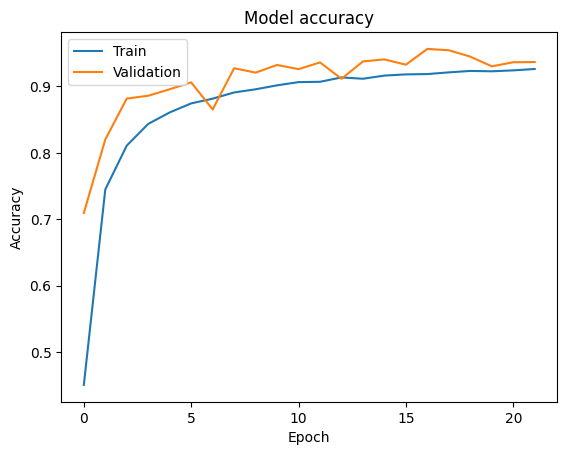

In [33]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

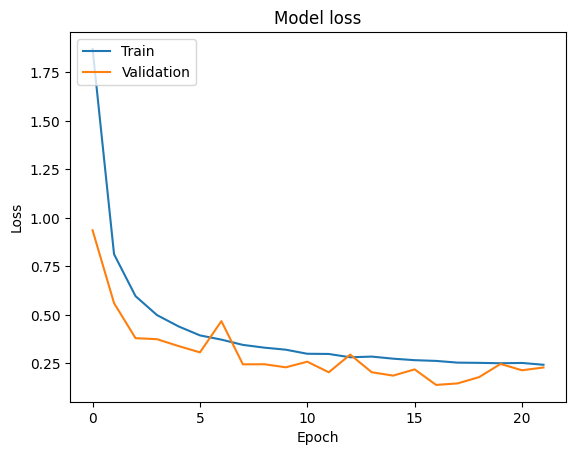

In [34]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [35]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [37]:
train_generator.class_indices.keys()

dict_keys(['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato__

In [38]:
list(train_generator.class_indices.keys())

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [39]:
r = dict(zip(list(train_generator.class_indices.values()) , list(train_generator.class_indices.keys())))

In [40]:
print(r)

{0: 'Apple___Apple_scab', 1: 'Apple___Black_rot', 2: 'Apple___Cedar_apple_rust', 3: 'Apple___healthy', 4: 'Blueberry___healthy', 5: 'Cherry_(including_sour)___Powdery_mildew', 6: 'Cherry_(including_sour)___healthy', 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 8: 'Corn_(maize)___Common_rust_', 9: 'Corn_(maize)___Northern_Leaf_Blight', 10: 'Corn_(maize)___healthy', 11: 'Grape___Black_rot', 12: 'Grape___Esca_(Black_Measles)', 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 14: 'Grape___healthy', 15: 'Orange___Haunglongbing_(Citrus_greening)', 16: 'Peach___Bacterial_spot', 17: 'Peach___healthy', 18: 'Pepper,_bell___Bacterial_spot', 19: 'Pepper,_bell___healthy', 20: 'Potato___Early_blight', 21: 'Potato___Late_blight', 22: 'Potato___healthy', 23: 'Raspberry___healthy', 24: 'Soybean___healthy', 25: 'Squash___Powdery_mildew', 26: 'Strawberry___Leaf_scorch', 27: 'Strawberry___healthy', 28: 'Tomato___Bacterial_spot', 29: 'Tomato___Early_blight', 30: 'Tomato___Late_blight', 31: 'To

In [44]:
import os

test_dir = '/Users/shankalpapokharel/AI Projects/gpu_ipd/Dataset/test/'

for filename in os.listdir(test_dir):
    try:
        path = os.path.join(test_dir, filename)
        predicted_class, confidence = prediction(path)
        print(f"File: {filename}, Predicted class: {predicted_class}, Confidence: {confidence}%")
    except:
        print("Couldn't read the file")

1/1 [==============================] - 0s 20ms/step
File: AppleScab3.JPG, Predicted class: Potato___Early_blight, Confidence: 95.59%
1/1 [==============================] - 0s 10ms/step
File: TomatoEarlyBlight2.JPG, Predicted class: Tomato___Early_blight, Confidence: 53.99%
1/1 [==============================] - 0s 10ms/step
File: TomatoEarlyBlight3.JPG, Predicted class: Tomato___Early_blight, Confidence: 99.03%
1/1 [==============================] - 0s 11ms/step
File: PotatoHealthy1.JPG, Predicted class: Potato___healthy, Confidence: 100.0%
1/1 [==============================] - 0s 13ms/step
File: AppleScab2.JPG, Predicted class: Apple___Apple_scab, Confidence: 100.0%
1/1 [==============================] - 0s 13ms/step
File: TomatoEarlyBlight1.JPG, Predicted class: Tomato___Early_blight, Confidence: 95.98%
1/1 [==============================] - 0s 14ms/step
File: PotatoHealthy2.JPG, Predicted class: Potato___healthy, Confidence: 99.99%
1/1 [==============================] - 0s 13ms/ste

In [62]:
path = "/Users/shankalpapokharel/Downloads/7.jpg"

In [63]:
prediction(path)

1/1 [==============================] - 0s 10ms/step


('Tomato___Leaf_Mold', 99.89)

In [66]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
        'Dataset/valid',
        target_size=(256, 256),
        class_mode='categorical')

# evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_data)

print('Test accuracy:', accuracy*100,"%")

Found 17572 images belonging to 38 classes.
550/550 [==============================] - 49s 89ms/step - loss: 0.1384 - accuracy: 0.9565
Test accuracy: 95.652174949646 %


In [73]:
path = "/Users/shankalpapokharel/Downloads/cc.jpg"
prediction(path)

1/1 [==============================] - 0s 20ms/step


('Tomato___Spider_mites Two-spotted_spider_mite', 99.94)